In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from sklearn.metrics import pairwise_distances
from Levenshtein import distance as levenshtein_distance

In [3]:
# Load your data
alpha_chain_data = pd.read_csv('cdr3_alpha_df.csv')
beta_chain_data = pd.read_csv('cdr3_beta_df.csv')
cdr3_alpha_beta = pd.read_csv('cdr3_alpha_beta_df.csv')

In [4]:
print(alpha_chain_data.head())

   complex.id       cdr3_a_aa         v_a_gene   j_a_gene      species  \
0           1   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
1           2  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
2           4   CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HomoSapiens   
3           5   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
4           6  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   

      mhc.a mhc.b mhc.class antigen.epitope  vdjdb.score  
0  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
1  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
2  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
3  HLA-B*08   B2M      MHCI        FLKEQGGL            2  
4  HLA-B*08   B2M      MHCI        FLKEQGGL            2  


In [5]:
print(beta_chain_data.head())

   complex.id             cdr3_b_aa   v_b_gene    j_b_gene      species  \
0           1  CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   
1           2   CASSFEPGQGFYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   
2           3  CASSYEPGQVSHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   
3           4        CASSALASLNEQFF  TRBV14*01  TRBJ2-1*01  HomoSapiens   
4           5  CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   

      mhc.a mhc.b mhc.class antigen.epitope  vdjdb.score  
0  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
1  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
2  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
3  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
4  HLA-B*08   B2M      MHCI        FLKEQGGL            2  


In [6]:
print(cdr3_alpha_beta.head())

   complex.id       cdr3_a_aa         v_a_gene   j_a_gene      species  \
0           1   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
1           2  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
2           4   CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HomoSapiens   
3           5   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
4           6  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   

      mhc.a mhc.b mhc.class antigen.epitope  vdjdb.score  \
0  HLA-B*08   B2M      MHCI        FLKEKGGL            2   
1  HLA-B*08   B2M      MHCI        FLKEKGGL            2   
2  HLA-B*08   B2M      MHCI        FLKEKGGL            2   
3  HLA-B*08   B2M      MHCI        FLKEQGGL            2   
4  HLA-B*08   B2M      MHCI        FLKEQGGL            2   

              cdr3_b_aa   v_b_gene    j_b_gene  
0  CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  
1   CASSFEPGQGFYSNQPQHF  TRBV13*01  TRBJ1-5*01  
2        CASSALASLNEQFF  TRBV14*01  TRBJ2-1*01 

In [7]:
# Extract CDR3 sequences
alpha_cdr3_homoSapiens_sequences = alpha_chain_data.loc[alpha_chain_data['species'] == 'HomoSapiens', 'cdr3_a_aa'].tolist()
alpha_cdr3_musMusculus_sequences = alpha_chain_data.loc[alpha_chain_data['species'] == 'MusMusculus', 'cdr3_a_aa'].tolist()
beta_cdr3_homoSapiens_sequences = beta_chain_data.loc[beta_chain_data['species'] == 'HomoSapiens', 'cdr3_b_aa'].tolist()
beta_cdr3_musMusculus_sequences = beta_chain_data.loc[beta_chain_data['species'] == 'MusMusculus', 'cdr3_b_aa'].tolist()
cdr3_alpha_beta_homoSapiens_sequences = [a + b for a, b in cdr3_alpha_beta.loc[cdr3_alpha_beta['species'] == 'HomoSapiens', ['cdr3_a_aa', 'cdr3_b_aa']].values.tolist()]
cdr3_alpha_beta_musMusculus_sequences = [a + b for a, b in cdr3_alpha_beta.loc[cdr3_alpha_beta['species'] == 'MusMusculus', ['cdr3_a_aa', 'cdr3_b_aa']].values.tolist()]


alpha_cdr3_sequences = alpha_cdr3_homoSapiens_sequences + alpha_cdr3_musMusculus_sequences
beta_cdr3_sequences = beta_cdr3_homoSapiens_sequences + beta_cdr3_musMusculus_sequences
cdr3_alpha_beta_sequences = cdr3_alpha_beta_homoSapiens_sequences + cdr3_alpha_beta_musMusculus_sequences


#cdr3_alpha_beta_sequences = cdr3_alpha_beta[['cdr3_a_aa','cdr3_b_aa']].values.tolist()
#cdr3_alpha_beta_sequences = [a + b for a, b in cdr3_alpha_beta[['cdr3_a_aa','cdr3_b_aa']].values.tolist()]

In [2]:
# Function to calculate the pairwise Levenshtein distance matrix
def levenshtein_distance_matrix(sequences):
    length = len(sequences)
    dist_matrix = np.zeros((length, length))
    for i in range(length):
        for j in range(i + 1, length):  # Use symmetry to save computation
            dist = levenshtein_distance(sequences[i], sequences[j])
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    return dist_matrix

# Compute the distance matrices
# alpha_distance_matrix = levenshtein_distance_matrix(alpha_cdr3_sequences)
# beta_distance_matrix = levenshtein_distance_matrix(beta_cdr3_sequences)
# cdr3_alpha_beta_distance_matrix = levenshtein_distance_matrix(cdr3_alpha_beta_sequences)

alpha_cdr3_homoSapiens_distance_matrix = levenshtein_distance_matrix(alpha_cdr3_homoSapiens_sequences)
alpha_cdr3_musMusculus_distance_matrix = levenshtein_distance_matrix(alpha_cdr3_musMusculus_sequences)
beta_cdr3_homoSapiens_distance_matrix = levenshtein_distance_matrix(beta_cdr3_homoSapiens_sequences)
beta_cdr3_musMusculus_distance_matrix = levenshtein_distance_matrix(beta_cdr3_musMusculus_sequences)
cdr3_alpha_beta_homoSapiens_distance_matrix = levenshtein_distance_matrix(cdr3_alpha_beta_homoSapiens_sequences)
cdr3_alpha_beta_musMusculus_distance_matrix = levenshtein_distance_matrix(cdr3_alpha_beta_musMusculus_sequences)

# Save the matrices to CSV files
# np.savetxt("alpha_distance_matrix.csv", alpha_distance_matrix, delimiter=",")
# np.savetxt("beta_distance_matrix.csv", beta_distance_matrix, delimiter=",")
# np.savetxt("cdr3_alpha_beta_distance_matrix.csv", cdr3_alpha_beta_distance_matrix, delimiter=",")

np.savetxt("alpha_cdr3_homoSapiens_distance_matrix.csv", alpha_cdr3_homoSapiens_distance_matrix, delimiter=",")
np.savetxt("alpha_cdr3_musMusculus_distance_matrix.csv", alpha_cdr3_musMusculus_distance_matrix, delimiter=",")
np.savetxt("beta_cdr3_homoSapiens_distance_matrix.csv", beta_cdr3_homoSapiens_distance_matrix, delimiter=",")
np.savetxt("beta_cdr3_musMusculus_distance_matrix.csv", beta_cdr3_musMusculus_distance_matrix, delimiter=",")
np.savetxt("cdr3_alpha_beta_homoSapiens_distance_matrix.csv", cdr3_alpha_beta_homoSapiens_distance_matrix, delimiter=",")
np.savetxt("cdr3_alpha_beta_musMusculus_distance_matrix.csv", cdr3_alpha_beta_musMusculus_distance_matrix, delimiter=",")

NameError: name 'alpha_cdr3_homoSapiens_sequences' is not defined

In [6]:
# Load the distance matrices from CSV files
# alpha_distance_matrix = pd.read_csv("alpha_distance_matrix.csv", delimiter=",")
# beta_distance_matrix = pd.read_csv("beta_distance_matrix.csv", delimiter=",")
# cdr3_alpha_beta_distance_matrix = pd.read_csv("cdr3_alpha_beta_distance_matrix.csv", delimiter=",")

alpha_cdr3_homoSapiens_distance_matrix = pd.read_csv("alpha_cdr3_homoSapiens_distance_matrix.csv", delimiter=",")
alpha_cdr3_musMusculus_distance_matrix = pd.read_csv("alpha_cdr3_musMusculus_distance_matrix.csv", delimiter=",")
beta_cdr3_homoSapiens_distance_matrix = pd.read_csv("beta_cdr3_homoSapiens_distance_matrix.csv", delimiter=",")
beta_cdr3_musMusculus_distance_matrix = pd.read_csv("beta_cdr3_musMusculus_distance_matrix.csv", delimiter=",")
cdr3_alpha_beta_homoSapiens_distance_matrix = pd.read_csv("cdr3_alpha_beta_homoSapiens_distance_matrix.csv", delimiter=",")
cdr3_alpha_beta_musMusculus_distance_matrix = pd.read_csv("cdr3_alpha_beta_musMusculus_distance_matrix.csv", delimiter=",")


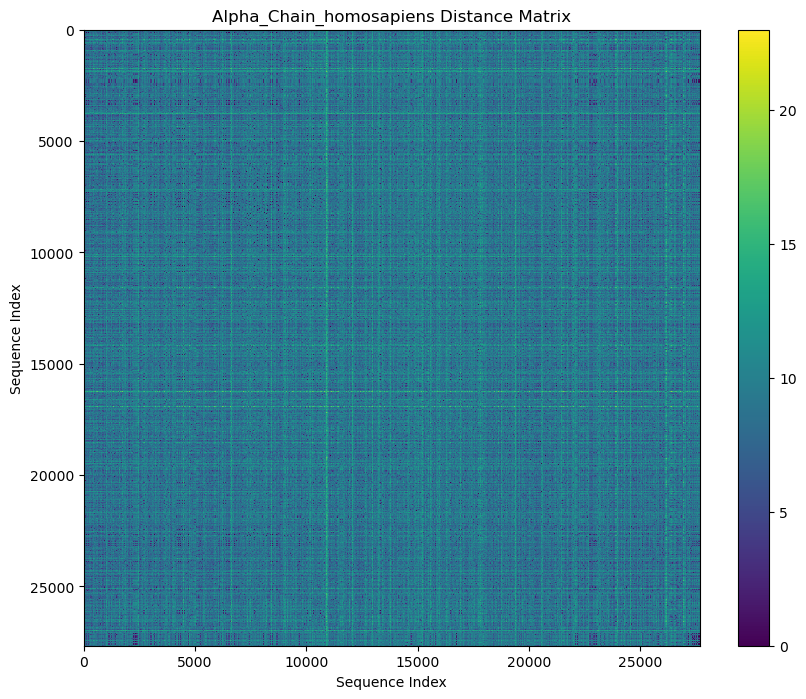

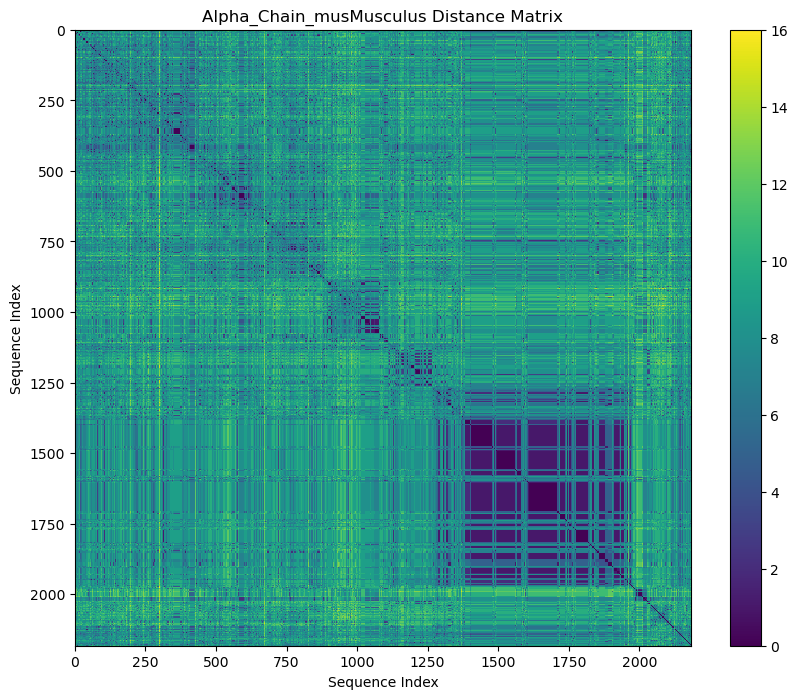

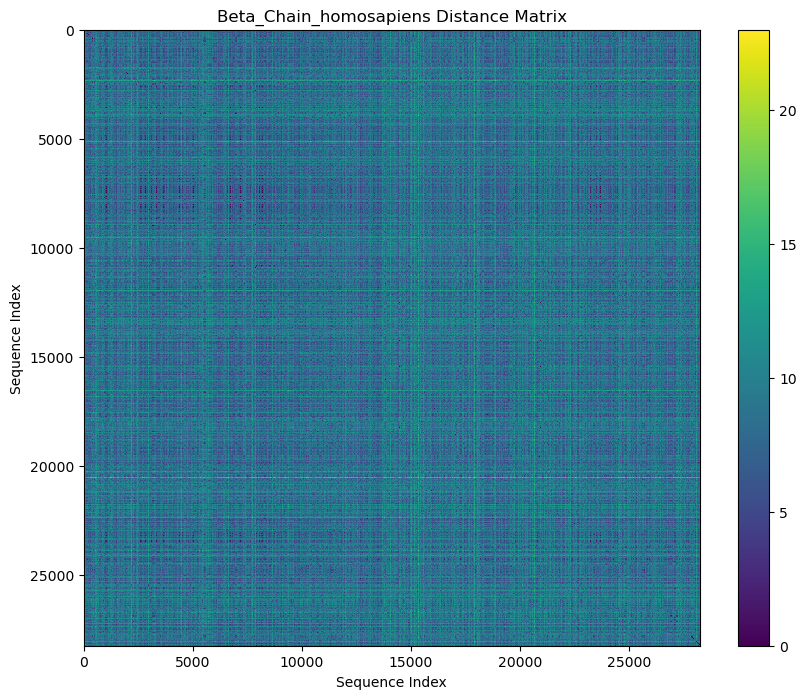

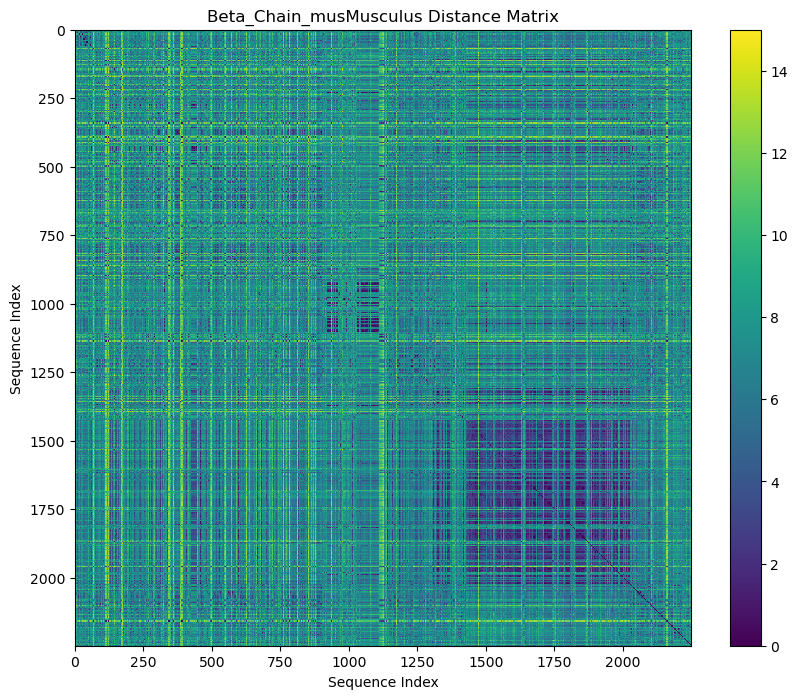

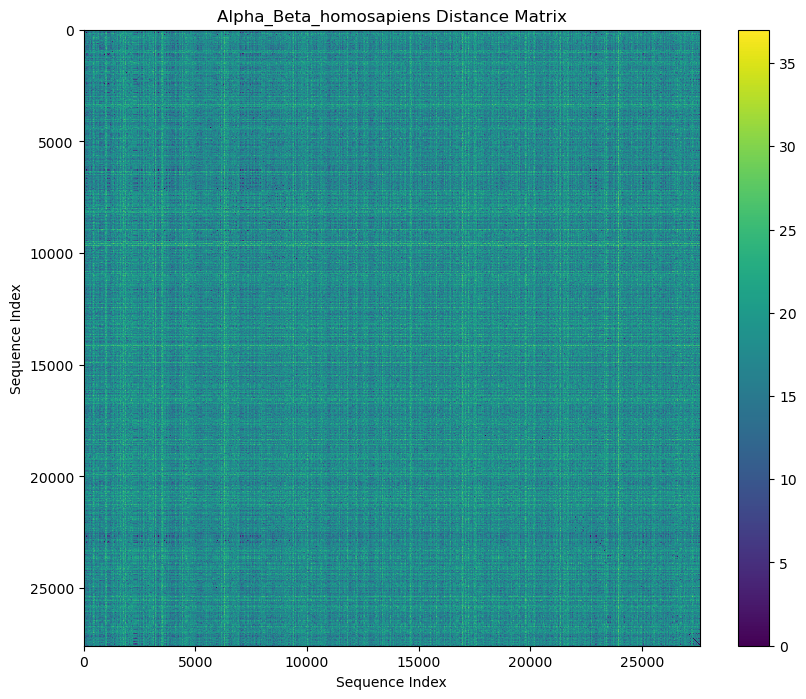

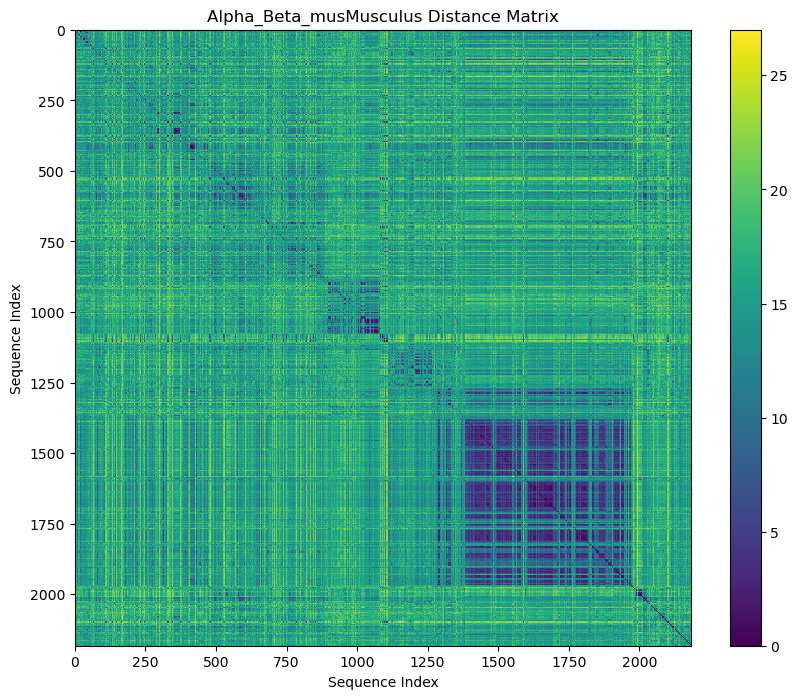

In [4]:
# Function to plot a distance matrix
def plot_distance_matrix(dist_matrix, title="Distance Matrix"):
    plt.figure(figsize=(10, 8))
    plt.imshow(dist_matrix, interpolation='nearest', cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.xlabel("Sequence Index")
    plt.ylabel("Sequence Index")
    plt.grid(False)
    plt.show()

# Plot the alpha and beta chain distance matrices
# plot_distance_matrix(alpha_distance_matrix, title="Alpha Chain Distance Matrix")
# plot_distance_matrix(beta_distance_matrix, title="Beta Chain Distance Matrix")
# plot_distance_matrix(cdr3_alpha_beta_distance_matrix, title="Alpha and Beta Chain Distance Matrix")
plot_distance_matrix(alpha_cdr3_homoSapiens_distance_matrix, title="Alpha_Chain_homosapiens Distance Matrix")
plot_distance_matrix(alpha_cdr3_musMusculus_distance_matrix, title="Alpha_Chain_musMusculus Distance Matrix")
plot_distance_matrix(beta_cdr3_homoSapiens_distance_matrix, title="Beta_Chain_homosapiens Distance Matrix")
plot_distance_matrix(beta_cdr3_musMusculus_distance_matrix, title="Beta_Chain_musMusculus Distance Matrix")
plot_distance_matrix(cdr3_alpha_beta_homoSapiens_distance_matrix, title="Alpha_Beta_homosapiens Distance Matrix")
plot_distance_matrix(cdr3_alpha_beta_musMusculus_distance_matrix, title="Alpha_Beta_musMusculus Distance Matrix")

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

In [8]:
def load_distance_matrix(filename):
    return pd.read_csv(filename, delimiter=",", index_col=0)

# load the distance matrices
distance_matrix = load_distance_matrix('cdr3_alpha_beta_distance_matrix.csv') 
print("Loaded distance matrix shape:", distance_matrix.shape)


Loaded distance matrix shape: (29761, 29761)


In [7]:
# 检查是否为方阵
if distance_matrix.shape[0] != distance_matrix.shape[1]:
    raise ValueError("Distance matrix must be square.")
else:
    print("Distance matrix is square.")

# 确保对角线元素为0
np.fill_diagonal(distance_matrix.values, 0)
print("Diagonal set to zero, checking diagonal:", distance_matrix.values.diagonal())


Distance matrix is square.
Diagonal set to zero, checking diagonal: [0. 0. 0. ... 0. 0. 0.]


In [11]:
# transform the distance matrix into a condensed distance matrix
condensed_distance_matrix = squareform(distance_matrix)
# perform hierarchical clustering
linkage_matrix = linkage(condensed_distance_matrix, method='ward')

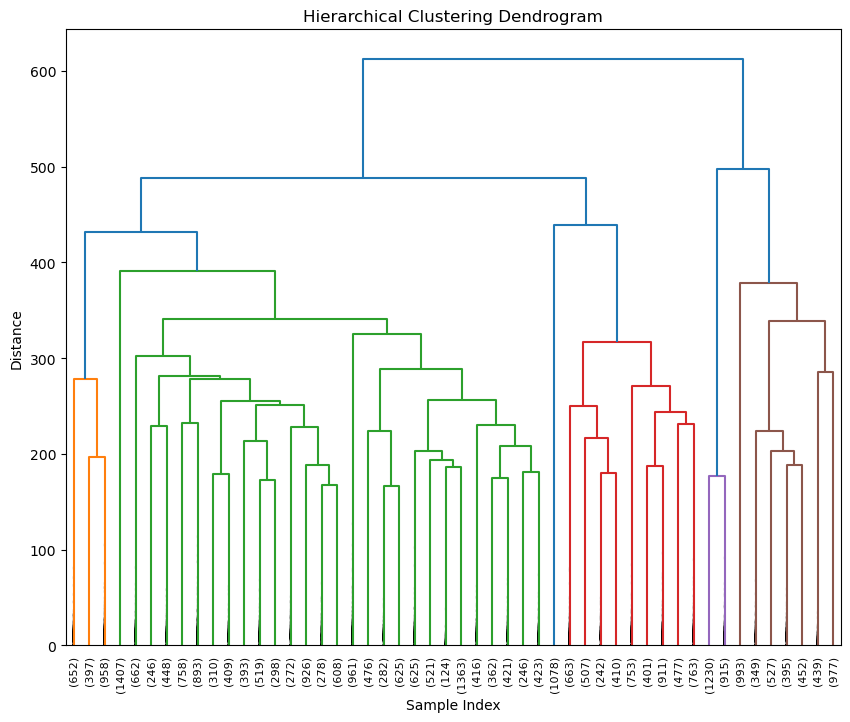

In [12]:
# 假设 linkage_matrix 是完整数据集的聚类结果
# 使用 truncate_mode 和 p 参数来限制显示的节点数量
def plot_dendrogram(linkage_matrix, title='Hierarchical Clustering Dendrogram', max_display=50):
    plt.figure(figsize=(10, 8))
    dendrogram(linkage_matrix, truncate_mode='lastp', p=max_display, show_contracted=True)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(linkage_matrix, max_display=50)


In [13]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
def plot_dendrogram(model, **kwargs):
    # 创建链接矩阵并绘制树状图
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # 叶节点
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # 绘制对应的树状图
    dendrogram(linkage_matrix, **kwargs)


e:\Anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


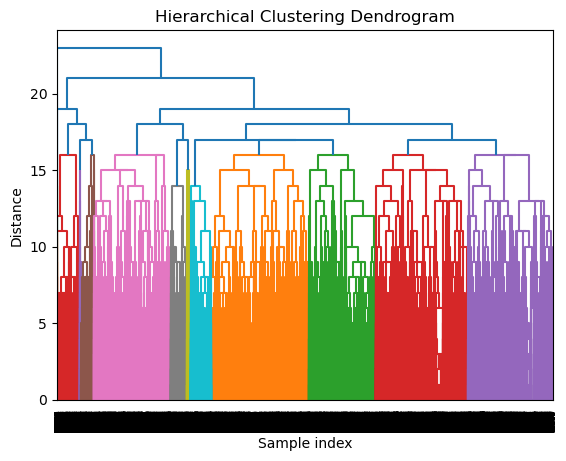

In [17]:
# 加载距离矩阵
distance_matrix = np.loadtxt('alpha_distance_matrix.csv', delimiter=',')

# 使用 AgglomerativeClustering，设置 affinity='precomputed' 和 linkage='complete'
clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='complete', distance_threshold=0)
clustering.fit(distance_matrix)

# 绘制树状图
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()
